# Segmentation

This notebook explores the segmentation function of tobac and its parameters.

In [15]:
import tobac
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

%matplotlib inline

To perform a segmentation we need a dataset with already detected features. Therefore, we take advantage of the *testing.make_sample_data_2D_3blobs_inv()*-utility and detect features with different thresholds:

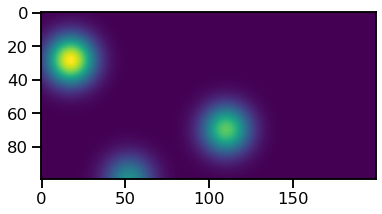

In [73]:
data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
thresholds = [9, 14, 17]
plt.imshow(data[50])
plt.show()

In [74]:
%%capture
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, thresholds)

The resulting dataset can now be used as argument for the *segmentation()*-function. The other required inputs are the original dataset, the spacing and a threshold. It is important to highlight that only single threshold values  are allowed. Because of that, we have to call the function multiple times to explore the influence of the threshold:

In [17]:
%%capture
mask_1, features_mask_1 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=9)
mask_2, features_mask_2 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=14)
mask_3, features_mask_3 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=17)

## Method

The segmentation uses certain techniques to associate areas or volumes to each identified feature. [Watershedding](https://en.wikipedia.org/wiki/Watershed_(image_processing)) is the default and the only implemented option at the moment, but in future realeases the method is selected by the *method*-keyword. The created segments are provided as masks, which is the first returned object of the function. The second output is the features-Dataset again, but with the additional *ncells*-variable, which gives us the number of datapoints belonging to the feature:

In [20]:
features_mask_1['ncells'][1]

<xarray.DataArray 'ncells' ()>
array(67.)
Coordinates:
    index    int64 1

Notice that this number can be deviate from the *num*-value, because watershedding works differently from just detecting the values exceeeding the threshold. For example, for the second segment *ncells* contains one additional datapoint compared to the original feature detection:

In [22]:
features_mask_1['num'][1]

<xarray.DataArray 'num' ()>
array(66)
Coordinates:
    index    int64 1

To visualize the segments we can use contour-plots of the masks:

Text(0.5, 1.0, 'Segments for different threshold values')

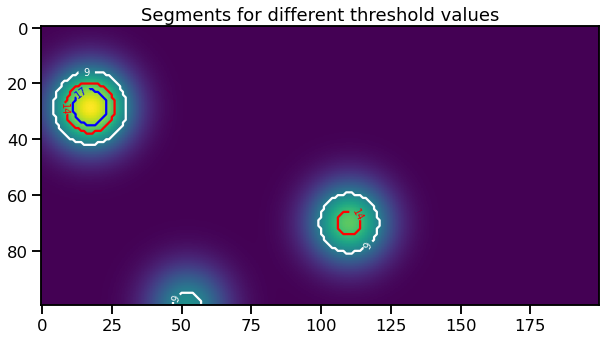

In [40]:
masks = [mask_1, mask_2, mask_3]
colors = ['white', 'red', 'blue']

fig, ax = plt.subplots(ncols = 1, figsize = (10, 10))
ax.imshow(data[50])

for n, mask, color in zip(thresholds, masks, colors):

    CS = ax.contour(mask[50]*n, levels = [n], colors = color)
    ax.clabel(CS, inline=True, fontsize=10)

ax.set_title('Segments for different threshold values')

Obviously, a lower threshold value prodcuces a larger segment and if a feature does not exceed the value at all, no segment is associated.

## max_distance 

Another way of determining the size of our segments is the *max_distance*-parameter. It defines a maximum distance the segment can have from the coordinates of feature.

In [117]:
%%capture

data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
thresh = 4
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, thresh)

mask_1, features_mask_1 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=thresh, max_distance=30000)
mask_2, features_mask_2 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=thresh, max_distance=10000)
mask_3, features_mask_3 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=thresh, max_distance=5000)

Text(0.5, 1.0, 'Segments for different maximum distances from the feature')

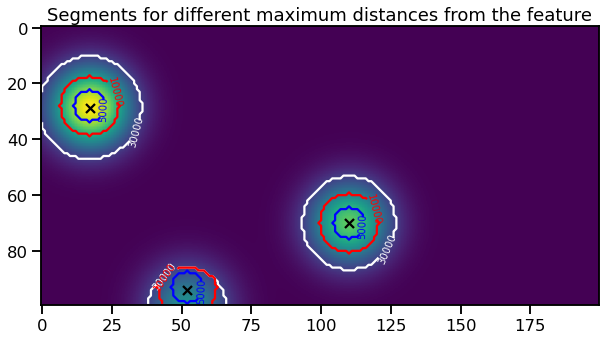

In [123]:
masks = [mask_1, mask_2, mask_3]
colors = ['white', 'red', 'blue']
distances = [3e4, 1e4, 5e3]
fig, ax = plt.subplots(ncols = 1, figsize = (10, 10))

mask = features['frame'] == 50
ax.imshow(data[50])
ax.scatter(features.where(mask)['hdim_2'], features.where(mask)['hdim_1'], marker = 'x', color = 'black')

for n, mask, color in zip(distances, masks, colors):

    CS = ax.contour(mask[50]*n, levels = [n], colors = color)
    ax.clabel(CS, inline=True, fontsize=10)

ax.set_title('Segments for different maximum distances from the feature')

## Target

Analogous to the feature detection, it is also possible to apply the segmantation to minima by changing the *target* keyword:

In [68]:
%%capture

data = -tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
thresholds = [-9, -14, -17]
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, thresholds, target='minimum')

mask_1, features_mask_1 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=-9, target='minimum')
mask_2, features_mask_2 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=-14, target='minimum')
mask_3, features_mask_3 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=-17, target='minimum')

Text(0.5, 1.0, 'Segments for different threshold values')

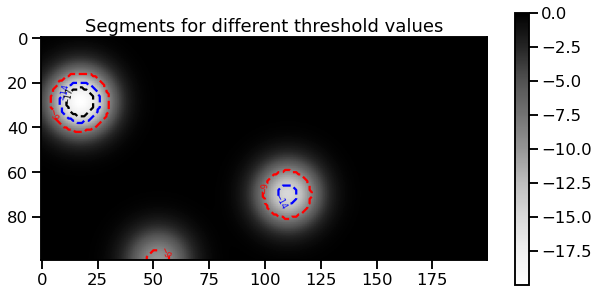

In [72]:
masks = [mask_1, mask_2, mask_3]
colors = ['red', 'blue', 'black']

fig, ax = plt.subplots(ncols = 1, figsize = (10, 10))
image = ax.imshow(data[50], cmap = 'Greys')
plt.colorbar(image, shrink = 0.5)

for n, mask, color in zip(thresholds, masks, colors):

    CS = ax.contour(mask[50]*n, levels = [n], colors = color)
    ax.clabel(CS, inline=True, fontsize = 8)

ax.set_title('Segments for different threshold values')

## level : 
slice of iris.cube.Cube, optional
        Levels at which to seed the cells for the watershedding
        algorithm. Default is None.
        
**Doesnt do anything?**

## vertical_coord : 
{'auto', 'z', 'model_level_number', 'altitude',
                      'geopotential_height'}, optional
        Name of the vertical coordinate for use in 3D segmentation case

Loading in 3-dimensioanl data:

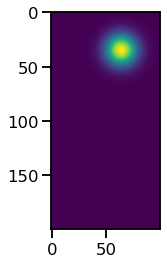

In [168]:
data = tobac.testing.make_sample_data_3D_3blobs()
plt.imshow(data[15, 19])
plt.show()

In [170]:
dxy, dt = tobac.utils.get_spacings(data)
thresholds = 9
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, thresholds)
mask_1, features_mask_1 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=9)

ValueError: too many values to unpack (expected 2)

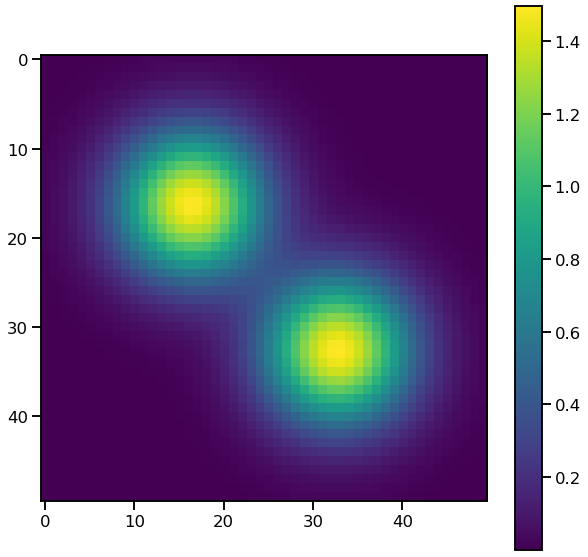

In [124]:
import numpy as np

x = np.linspace(-3, 3)
y = np.linspace(-3, 3)
xx, yy = np.meshgrid(x, y)

exp1 = 1.5*np.exp(-((xx+1)**2+(yy+1)**2))
exp2 = 1.5*np.exp(-((1-xx)**2+(1-yy)**2))

asymmetric_data = np.expand_dims(exp1 + exp2, axis=0)

plt.figure(figsize=(10,10))
plt.imshow(asymmetric_data[0])
plt.colorbar()

In [125]:
import xarray as xr

date = np.datetime64('2022-04-01T00:00', )
assym = xr.DataArray(data=asymmetric_data, coords={'time':np.expand_dims(date, axis = 0),'y':y, 'x':x})
assym

<xarray.DataArray (time: 1, y: 50, x: 50)>
array([[[5.03193942e-04, 8.08982942e-04, 1.26217600e-03, ...,
         2.84097094e-08, 1.30824379e-08, 6.18346087e-09],
        [8.08982942e-04, 1.30059873e-03, 2.02919544e-03, ...,
         5.35536234e-08, 2.60828595e-08, 1.30824379e-08],
        [1.26217600e-03, 2.02919544e-03, 3.16595276e-03, ...,
         1.03617229e-07, 5.35536234e-08, 2.84097094e-08],
        ...,
        [2.84097094e-08, 5.35536234e-08, 1.03617229e-07, ...,
         3.16595276e-03, 2.02919544e-03, 1.26217600e-03],
        [1.30824379e-08, 2.60828595e-08, 5.35536234e-08, ...,
         2.02919544e-03, 1.30059873e-03, 8.08982942e-04],
        [6.18346087e-09, 1.30824379e-08, 2.84097094e-08, ...,
         1.26217600e-03, 8.08982942e-04, 5.03193942e-04]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-04-01
  * y        (y) float64 -3.0 -2.878 -2.755 -2.633 ... 2.633 2.755 2.878 3.0
  * x        (x) float64 -3.0 -2.878 -2.755 -2.633 ... 2.633 2.755 2.878 3.0

In [132]:
%%capture
dxy = (assym['x'][1] - assym['x'][0])
threshold = 0.7
features = tobac.themes.tobac_v1.feature_detection_multithreshold(assym, dxy, threshold= [threshold])
mask, features_mask = tobac.themes.tobac_v1.segmentation(features, assym, dxy, threshold=0.4)

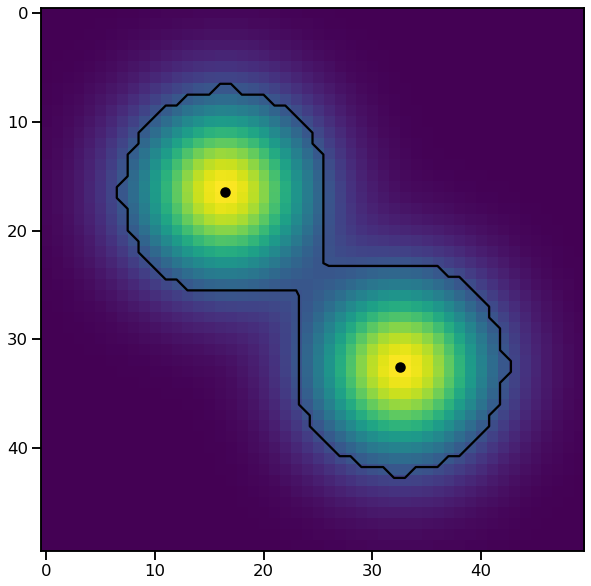

In [133]:
fig, ax = plt.subplots(ncols = 1, figsize = (10, 10))

ax.imshow(assym[0])
ax.scatter(features['hdim_2'], features['hdim_1'], color = 'k')
ax.contour(mask, levels = [0.5], colors = 'k')

In [134]:
features_mask

<xarray.Dataset>
Dimensions:          (index: 2)
Coordinates:
  * index            (index) int64 0 1
Data variables:
    frame            (index) int64 0 0
    idx              (index) int64 1 2
    hdim_1           (index) float64 16.49 32.51
    hdim_2           (index) float64 16.49 32.51
    num              (index) int64 162 162
    threshold_value  (index) float64 0.7 0.7
    feature          (index) int64 1 2
    time             (index) object 2022-04-01 00:00:00 2022-04-01 00:00:00
    timestr          (index) object '2022-04-01 00:00:00' '2022-04-01 00:00:00'
    y                (index) float64 -0.9803 0.9803
    x                (index) float64 -0.9803 0.9803
    ncells           (index) int64 289 289

In [152]:
tobac.analysis.calculate_area(features, mask)

ValueError: either latitude/longitude or projection_x_coordinate/projection_y_coordinate have to be present to calculate distances